In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('cleaned_dataset.csv')
df.shape

(1359, 12)

In [3]:
X = df.drop("quality", axis=1)
y = df["quality"]              

In [4]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [6]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance[:10])

Explained Variance Ratio: [0.43638999 0.1749662  0.12138744 0.07944695 0.06978779 0.04488825
 0.03052823 0.02342561 0.00973701 0.00619556]


In [7]:
cum_var = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Explained Variance:", cum_var)

Cumulative Explained Variance: [0.43638999 0.61135619 0.73274363 0.81219057 0.88197836 0.92686661
 0.95739484 0.98082045 0.99055746 0.99675302 1.        ]


In [16]:
pca=PCA(n_components=6)
X_pca = pca.fit_transform(X_scaled)

In [17]:
print("Original shape:", X_scaled.shape)
print("Reduced shape:", X_pca.shape)

Original shape: (1359, 11)
Reduced shape: (1359, 6)


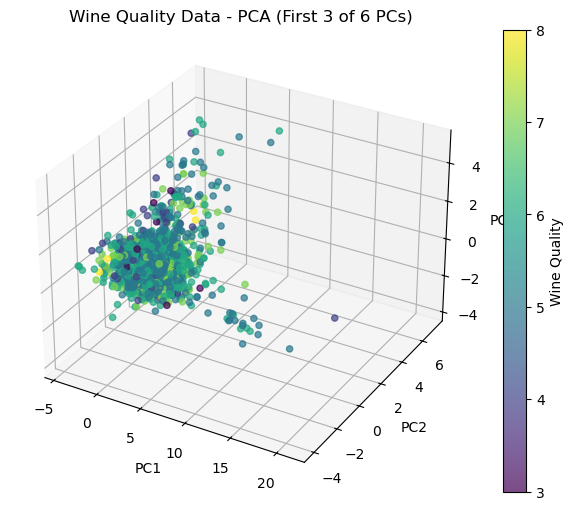

In [23]:
from mpl_toolkits.mplot3d import Axes3D
pca_k = PCA(n_components=6)
X_pca_k = pca_k.fit_transform(X_scaled)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    X_pca_k[:,0],  # PC1
    X_pca_k[:,1],  # PC2
    X_pca_k[:,2],  # PC3
    c=y, cmap="viridis", alpha=0.7
)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Wine Quality Data - PCA (First 3 of 6 PCs)")

fig.colorbar(scatter, label="Wine Quality")
plt.show()


In [11]:
print("PC1 mean:", np.mean(X_pca[:, 0]), "PC1 std:", np.std(X_pca[:, 0]))
print("PC2 mean:", np.mean(X_pca[:, 1]), "PC2 std:", np.std(X_pca[:, 1]))


PC1 mean: -4.18273869468786e-17 PC1 std: 2.1708028448207557
PC2 mean: 6.27410804203179e-17 PC2 std: 1.3745485089439113


In [12]:
threshold = 0.90

In [13]:
k = np.argmax(cum_var >= threshold) + 1
print(f"Optimal number of components for {threshold*100:.0f}% variance:", k)


Optimal number of components for 90% variance: 6


In [14]:
from sklearn.metrics import mean_squared_error
pca_k = PCA(n_components=k)
X_pca_k = pca_k.fit_transform(X_scaled)
X_reconstructed = pca_k.inverse_transform(X_pca_k)

reconstruction_error = mean_squared_error(X_scaled, X_reconstructed)
print(f"Reconstruction Error with {k} PCs:", reconstruction_error)


Reconstruction Error with 6 PCs: 0.07179413817355818


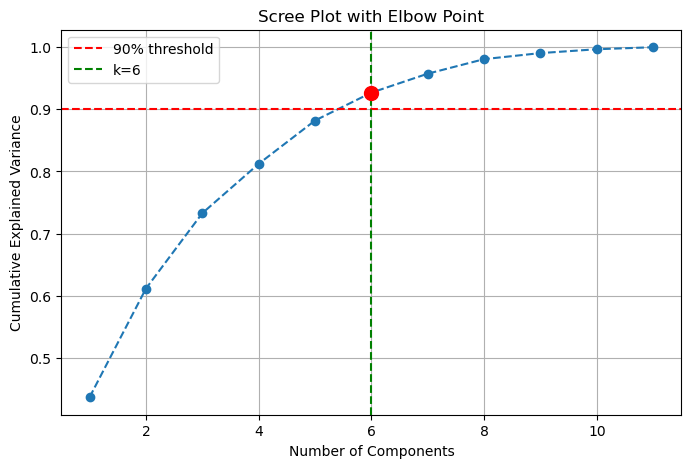

In [25]:
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)
cum_var = np.cumsum(pca_full.explained_variance_ratio_)
threshold = 0.90
k = np.argmax(cum_var >= threshold) + 1
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cum_var)+1), cum_var, marker='o', linestyle='--')
plt.axhline(y=threshold, color='r', linestyle='--', label=f'{threshold*100:.0f}% threshold')
plt.axvline(x=k, color='g', linestyle='--', label=f'k={k}')
plt.scatter(k, cum_var[k-1], color='red', s=100, zorder=5)  # highlight elbow
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot with Elbow Point")
plt.legend()
plt.grid(True)
plt.show()
